# Hand Movement- Recognition of Communication Type

In [1]:
#Goal of this project: predicting the label- meaning what kind of a communication the people are having, their State.
#by the data's (hands) features.

# baseline cnn model for Hand Recognition

from matplotlib import pyplot
from keras.utils import to_categorical
from keras.layers import Dense

#import stuff for the project

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

#sklearn stuff importing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#for data cleaning- organizing
import glob 

Using TensorFlow backend.
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\97252\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
a1=pd.read_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\Unity Data\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
a1['State']= '1'
a1.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,State
0,335.9984,128556,right,2,128.63570,224.0294,-12.29588,-18.26243,-140.54450,-117.57790,...,177.5125,173.5658,-14.569630,276.8753,-33.68264,91.61740,0.0,1.250576,0.0,1
1,335.9984,128556,left,2,-93.24845,143.9423,-37.81597,-109.09820,240.38980,-67.62959,...,-147.0455,109.9380,-5.326688,-329.8577,-34.41571,93.88171,0.0,0.014736,0.0,1
2,336.0150,128558,right,2,129.15550,221.9923,-15.00181,47.36464,-64.25022,-168.85850,...,177.7894,171.1952,-14.677850,276.0645,-33.15913,97.88171,0.0,1.069930,0.0,1
3,336.0150,128558,left,2,-94.86554,148.5542,-39.00158,-80.99012,278.60220,-66.79356,...,-148.2022,113.0909,-7.375025,-326.9279,-39.97873,85.98000,0.0,0.000000,0.0,1
4,336.0315,128560,right,2,129.87070,220.7944,-18.38681,35.05422,-84.74242,-205.72030,...,178.3730,169.9159,-15.246240,276.1767,-30.72506,104.13920,0.0,0.916969,0.0,1


In [3]:
#Spontan- as 1. Sync- as 2. Alone-as 3.

#PROCESSING THE TRAINING DATA 

i=1
dfs = pd.DataFrame()
dfs = dfs.fillna(0)

for path in glob.glob(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\Unity Data\Training\*'): 
    paths= path+"\*"
    for pathy in glob.glob(paths): 
        name=str(i)
        name=pd.read_csv(pathy)
        if "Spontan" in pathy:
            name['State']= '1'
        if "Sync" in pathy:
           name['State']= '2'
        if "Alone" in pathy:
           name['State']= '3'
        i += 1
        dfs = pd.concat([dfs, name])
        
#dfs.head() 
dfs.to_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\dfs.csv', index = False) #checking if this is actually the dataset we wish to gey

dfs.columns = dfs.columns.str.strip() #dealing with error, caused by leading whistespaces in column names in the csv file

gp=dfs.groupby('Hand Type')

In [4]:
#Right
righty= gp.get_group('right')
righty.columns = [str(col) + '_Right' for col in righty.columns]
righty

#Left
lefty= gp.get_group('left')
lefty.columns = [str(col) + '_Left' for col in lefty.columns]
lefty

#reset_indexes
righty=righty.reset_index(drop=True)
lefty=lefty.reset_index(drop=True)

#concat them
done=pd.concat([righty, lefty], axis=1)
done.to_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\training set.csv', index = False) #checking if this is actually the dataset we wish to gey



In [5]:
#editing the df
#removing unessucery columns, which will ruin the prediction process

done=done.drop('Frame ID_Right', axis=1)
done=done.drop(labels='Frame ID_Left', axis=1)
done=done.drop(labels='Hand Type_Right', axis=1) 
done=done.drop(labels='Hand Type_Left', axis=1)
done=done.drop(labels='# hands_Left', axis=1) 
done=done.drop(labels='# hands_Right', axis=1) 
done=done.drop(labels='Time_Left', axis=1) 
done=done.drop(labels='Time_Right', axis=1) 
done=done.drop(labels='State_Right', axis=1) 

done

,Position X_Right,Position Y_Right,Position Z_Right,Velocity X_Right,Velocity Y_Right,Velocity Z_Right,Pitch_Right,Roll_Right,Yaw_Right,Wrist Pos X_Right,...,Wrist Pos X_Left,Wrist Pos Y_Left,Wrist Pos Z_Left,Elbow pos X_Left,Elbow Pos Y_Left,Elbow Pos Z_Left,Grab Strenth_Left,Grab Angle_Left,Pinch Strength_Left,State_Left
0,128.6357,224.0294,-12.29588,-18.26243,-140.54450,-117.5779,1.586300,-0.847425,-1.588251,177.5125,...,-147.0455,109.9380,-5.326688,-329.8577,-34.415710,93.88171,0.0,0.014736,0.0,1
1,129.1555,221.9923,-15.00181,47.36464,-64.25022,-168.8585,1.533391,-0.843926,-1.528183,177.7894,...,-148.2022,113.0909,-7.375025,-326.9279,-39.978730,85.98000,0.0,0.000000,0.0,1
2,129.8707,220.7944,-18.38681,35.05422,-84.74242,-205.7203,1.475221,-0.837075,-1.461710,178.3730,...,-148.3343,115.9295,-9.437292,-322.0559,-44.423830,81.02193,0.0,0.000000,0.0,1
3,131.0721,219.2134,-22.05511,36.51635,-153.35370,-212.8259,1.403105,-0.826226,-1.380241,179.5035,...,-148.3562,118.3093,-10.919770,-314.2976,-49.041100,81.41824,0.0,0.000000,0.0,1
4,132.4629,216.8003,-25.45043,98.73232,-65.53646,-218.7201,1.330840,-0.838546,-1.287442,179.5375,...,-149.2292,121.7602,-12.780660,-299.9106,-56.553780,85.03669,0.0,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-107.8500,127.8215,32.852500,-318.7630,20.751860,138.01250,0.0,0.000000,0.0,2
113402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-108.0805,128.1729,33.403910,-314.6744,14.308990,139.99090,0.0,0.000000,0.0,2
113403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-109.0018,129.5246,33.898560,-304.9600,-0.548136,142.01090,0.0,0.000000,0.0,2
113404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-109.7250,130.7078,34.033600,-295.5957,-14.978170,140.02630,0.0,0.000000,0.0,2


In [6]:
#fill NaNs with 0 so we can build a model

done=done.fillna(0)

#change the df from str to int to apply numeric calculations needed for the model

done=done.apply(pd.to_numeric, errors='ignore')

#done.columns = done.columns.str.strip().str.replace(' ', '').str.replace('(', '').str.replace(')', '')

done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113406 entries, 0 to 113405
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Position X_Right      113406 non-null  float64
 1   Position Y_Right      113406 non-null  float64
 2   Position Z_Right      113406 non-null  float64
 3   Velocity X_Right      113406 non-null  float64
 4   Velocity Y_Right      113406 non-null  float64
 5   Velocity Z_Right      113406 non-null  float64
 6   Pitch_Right           113406 non-null  float64
 7   Roll_Right            113406 non-null  float64
 8   Yaw_Right             113406 non-null  float64
 9   Wrist Pos X_Right     113406 non-null  float64
 10  Wrist Pos Y_Right     113406 non-null  float64
 11  Wrist Pos Z_Right     113406 non-null  float64
 12  Elbow pos X_Right     113406 non-null  float64
 13  Elbow Pos Y_Right     113406 non-null  float64
 14  Elbow Pos Z_Right     113406 non-null  float64
 15  

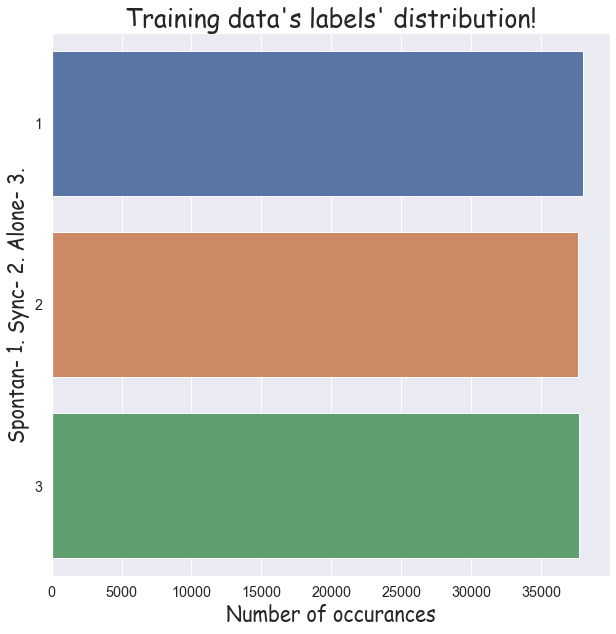

<Figure size 432x288 with 0 Axes>

In [7]:
#Graph: Training data's labels' distribution!

import seaborn as sns

sns.set(font_scale=1.3)  # crazy big

plt.figure(figsize=(10, 10))

axes = sns.countplot(y=done.State_Left)

csfont = {'fontname':'Comic Sans MS'}

axes.set_title("Training data's labels' distribution!",**csfont,fontsize=25)
axes.set_ylabel('Spontan- 1. Sync- 2. Alone- 3.',fontsize=20,**csfont)
axes.set_xlabel(' Number of occurances ',fontsize=20,**csfont)

fig1 = plt.gcf()
plt.show()
plt.draw()

#Seems like they're equally divided there!

In [8]:
#tTEST dataset preparing

#gathering the dataset  from the Validation folder

#Spontan- as 1. Sync- as 2. Alone-as 3.

import pandas as pd
import glob #for collecting the datasets

i=1
dfsa = pd.DataFrame()
dfsa = dfsa.fillna(0)

for path in glob.glob(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\Unity Data\Validation\*'): 
    paths= path+"\*"
    for pathy in glob.glob(paths): 
        name=str(i)
        name=pd.read_csv(pathy)
        if "Spontan" in pathy:
            name['State']= '1'
        if "Sync" in pathy:
           name['State']= '2'
        if "Alone" in pathy:
           name['State']= '3'
        i += 1
        dfsa = pd.concat([dfsa, name])
        
#dfs.head() 
dfsa.to_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\dfs.csv', index = False) #checking if this is actually the dataset we wish to gey

dfsa.columns = dfsa.columns.str.strip() #dealing with error, caused by leading whistespaces in column names in the csv file


gpa=dfsa.groupby('Hand Type')


#Hand Type: Right
rightya= gpa.get_group('right')
rightya.columns = [str(col) + '_Right' for col in rightya.columns]
rightya

#Hand Type: Left
leftya= gpa.get_group('left')
leftya.columns = [str(col) + '_Left' for col in leftya.columns]
leftya

#reset_indexes
rightya=rightya.reset_index(drop=True)
leftya=leftya.reset_index(drop=True)

#concat them
testy=pd.concat([rightya, leftya], axis=1)
testy.to_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\test set.csv', index = False) #checking if this is actually the dataset we wish to gey

In [9]:
#editing the df
#removing unessucery columns, which will ruin the prediction process

testy=testy.drop('Frame ID_Right', axis=1)
testy=testy.drop(labels='Frame ID_Left', axis=1)
testy=testy.drop(labels='Hand Type_Right', axis=1) 
testy=testy.drop(labels='Hand Type_Left', axis=1)
testy=testy.drop(labels='# hands_Left', axis=1) 
testy=testy.drop(labels='# hands_Right', axis=1) 
testy=testy.drop(labels='Time_Left', axis=1) 
testy=testy.drop(labels='Time_Right', axis=1) 
testy=testy.drop(labels='State_Right', axis=1) 

testy

,Position X_Right,Position Y_Right,Position Z_Right,Velocity X_Right,Velocity Y_Right,Velocity Z_Right,Pitch_Right,Roll_Right,Yaw_Right,Wrist Pos X_Right,...,Wrist Pos X_Left,Wrist Pos Y_Left,Wrist Pos Z_Left,Elbow pos X_Left,Elbow Pos Y_Left,Elbow Pos Z_Left,Grab Strenth_Left,Grab Angle_Left,Pinch Strength_Left,State_Left
0,65.37845,224.3082,112.7590,-112.50850,-293.12840,318.1064,1.540003,-0.472124,-1.555058,129.0877,...,-276.7855,279.1037,91.25497,-481.7012,163.33340,167.2560,0.0,0.550612,0.460952,1
1,63.55072,220.1848,117.9353,-57.90208,-37.84834,377.7369,1.587966,-0.474167,-1.579605,127.3381,...,-273.1128,287.6982,89.44084,-475.7014,169.70460,168.2110,0.0,0.540570,0.128885,1
2,61.66813,217.5243,122.5986,-90.69568,-84.79558,298.4662,1.622329,-0.473525,-1.597150,125.6021,...,-266.7606,292.2765,84.58584,-476.9575,194.33680,170.5766,0.0,0.531251,0.000000,1
3,60.27318,215.3182,126.5812,-66.44232,-100.88130,269.1542,1.647177,-0.474393,-1.609908,124.1724,...,-261.4522,294.0959,80.23443,-476.6987,203.87920,162.0833,0.0,0.922387,0.000000,1
4,59.31719,213.2799,127.7234,-110.60830,-235.83750,132.1554,1.654579,-0.465055,-1.612697,123.4233,...,-259.2695,293.6653,78.31818,-475.7375,204.09840,157.6196,0.0,1.152665,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-147.8138,259.3566,67.54475,-297.0281,46.91618,124.6248,0.0,0.134292,0.000000,2
33433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-146.5180,264.2275,68.33587,-296.1151,51.47042,123.1911,0.0,0.114307,0.000000,2
33434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-145.1963,267.8716,68.90888,-298.0420,57.52314,124.0967,0.0,0.075099,0.000000,2
33435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-143.7923,273.4537,69.90453,-300.8497,65.10999,120.6967,0.0,0.029208,0.000000,2


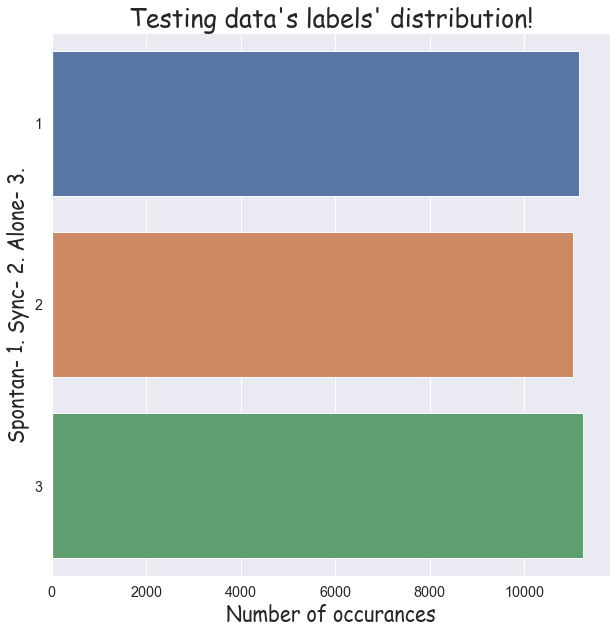

<Figure size 432x288 with 0 Axes>

In [10]:
#Graph: Testing data's labels' distribution!

import seaborn as sns

sns.set(font_scale=1.3)  # crazy big

plt.figure(figsize=(10, 10))

axes = sns.countplot(y=testy.State_Left)

csfont = {'fontname':'Comic Sans MS'}

axes.set_title("Testing data's labels' distribution!",**csfont,fontsize=25)
axes.set_ylabel('Spontan- 1. Sync- 2. Alone- 3.',fontsize=20,**csfont)
axes.set_xlabel(' Number of occurances ',fontsize=20,**csfont)

fig1 = plt.gcf()
plt.show()
plt.draw()

#Seems like they're equally divided there too!

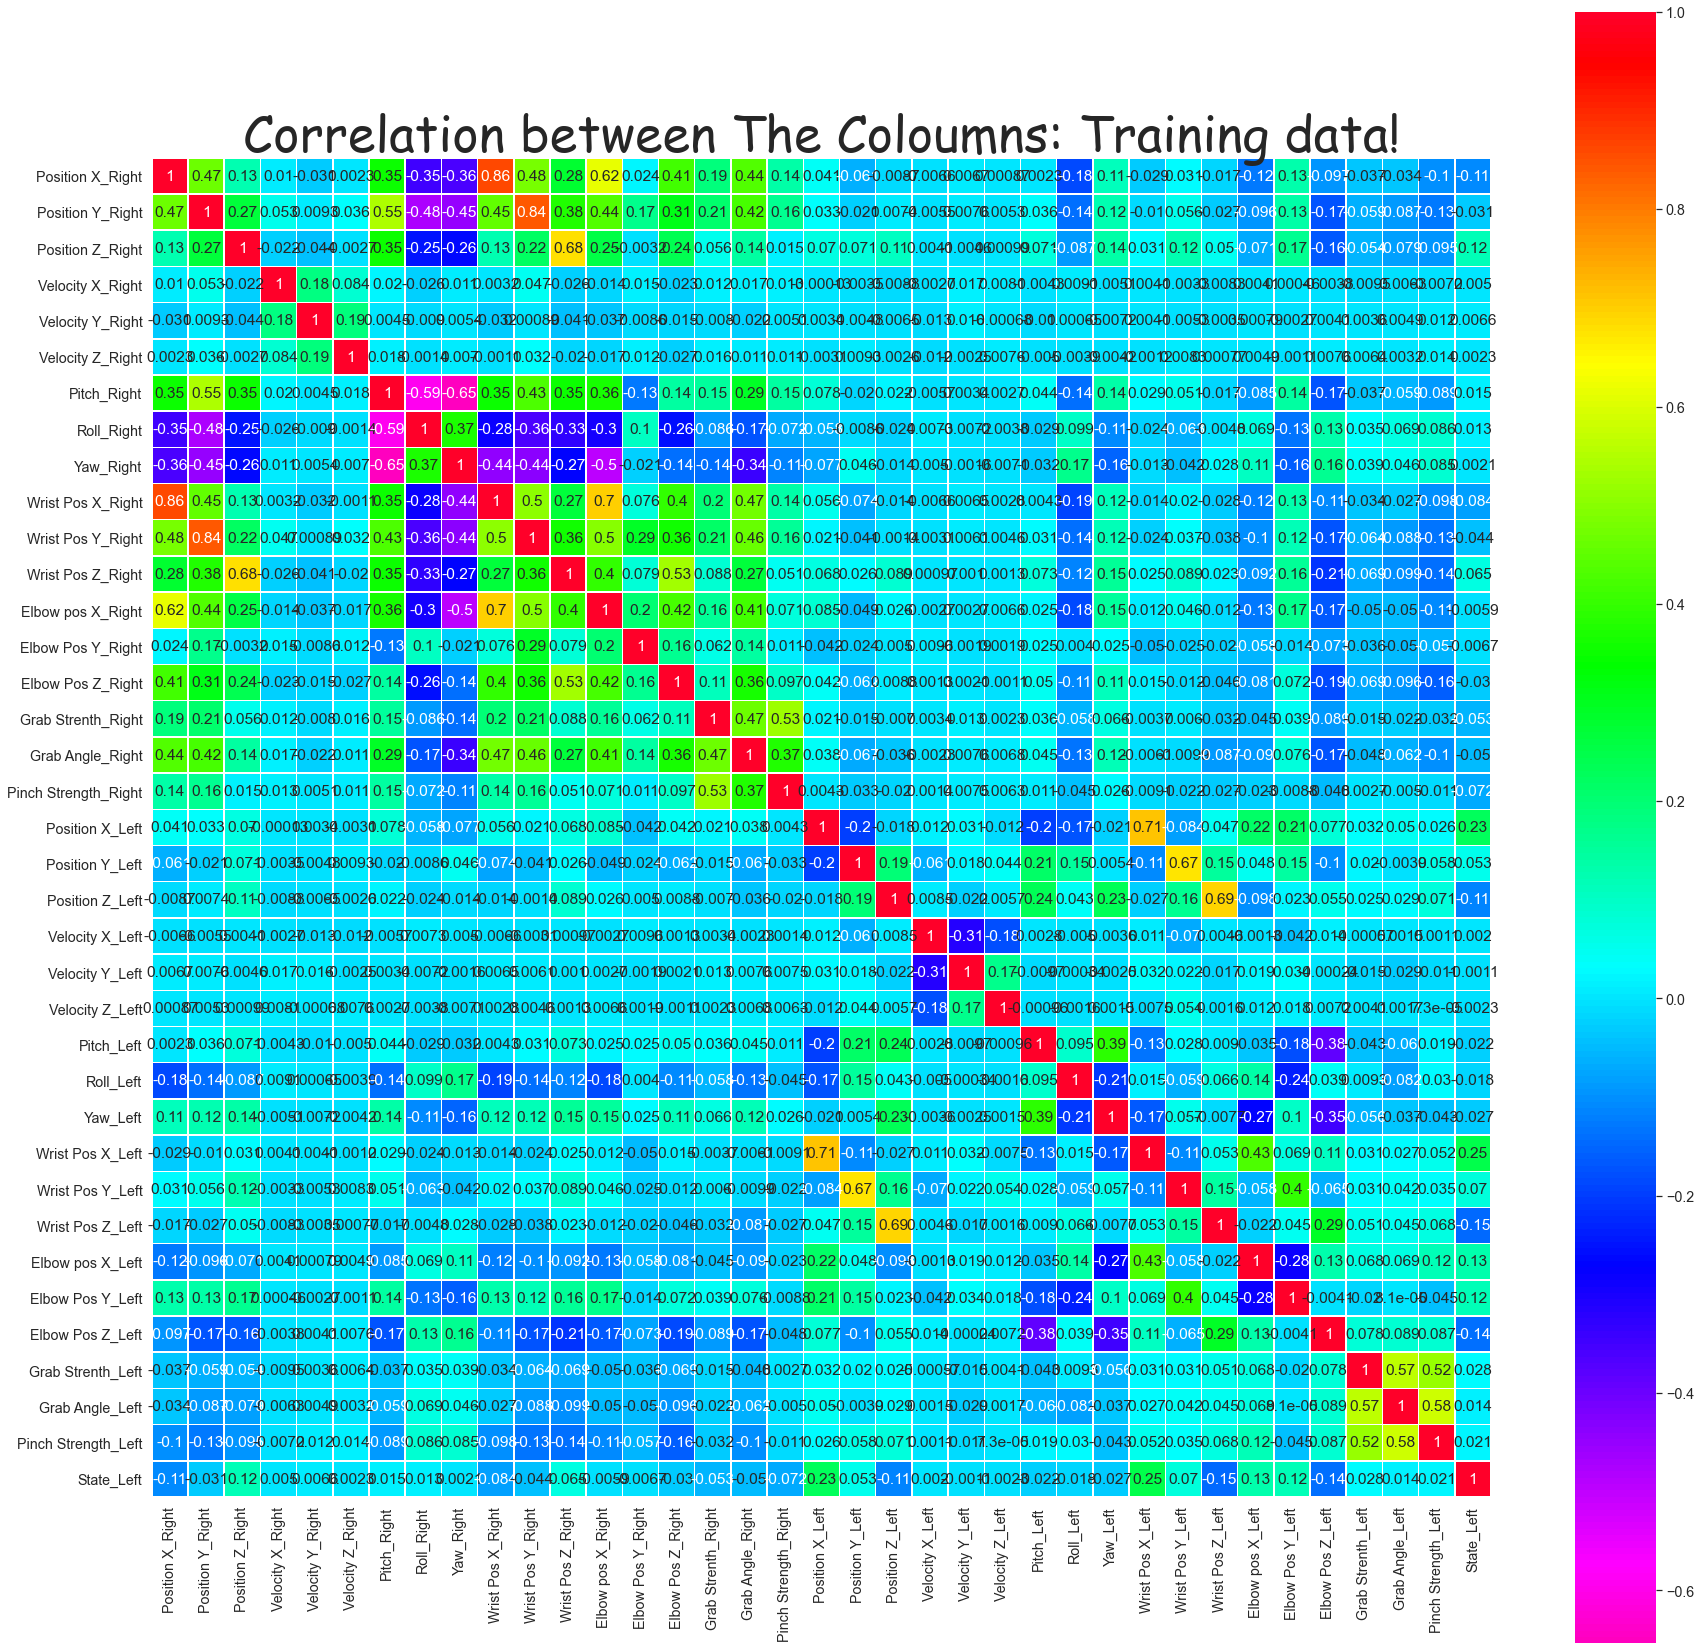

In [11]:
#Graph: Showing correlation between the columns in the training data!

#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. 
#For any non-numeric data type columns in the dataframe it is ignored
#Note: The correlation of a variable with itself is 1.

#Using corr() function to find the correlation among
#the columns in the dataframe using ‘kendall’ method:

fig = plt.figure(figsize=(30,30))
axes=sns.heatmap(done.corr(method ='kendall'),annot=True,square=True,cmap="gist_rainbow_r", linewidths=.5)
axes.set_title("Correlation between The Coloumns: Training data!",**csfont,fontsize=50)

plt.show()

In [12]:
#Let's fill NaNs with 0 so we can build a model

testy=testy.fillna(0)

#change the df from str to int to apply numeric calculations needed for the model

testy=testy.apply(pd.to_numeric, errors='ignore')

testy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33437 entries, 0 to 33436
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position X_Right      33437 non-null  float64
 1   Position Y_Right      33437 non-null  float64
 2   Position Z_Right      33437 non-null  float64
 3   Velocity X_Right      33437 non-null  float64
 4   Velocity Y_Right      33437 non-null  float64
 5   Velocity Z_Right      33437 non-null  float64
 6   Pitch_Right           33437 non-null  float64
 7   Roll_Right            33437 non-null  float64
 8   Yaw_Right             33437 non-null  float64
 9   Wrist Pos X_Right     33437 non-null  float64
 10  Wrist Pos Y_Right     33437 non-null  float64
 11  Wrist Pos Z_Right     33437 non-null  float64
 12  Elbow pos X_Right     33437 non-null  float64
 13  Elbow Pos Y_Right     33437 non-null  float64
 14  Elbow Pos Z_Right     33437 non-null  float64
 15  Grab Strenth_Right 

In [14]:
#Reading the Data and Performing Basic Data Checks

df=done #this is the training set of this project
dfa=testy #this is the testing set of this project

df.head()

,Position X_Right,Position Y_Right,Position Z_Right,Velocity X_Right,Velocity Y_Right,Velocity Z_Right,Pitch_Right,Roll_Right,Yaw_Right,Wrist Pos X_Right,...,Wrist Pos X_Left,Wrist Pos Y_Left,Wrist Pos Z_Left,Elbow pos X_Left,Elbow Pos Y_Left,Elbow Pos Z_Left,Grab Strenth_Left,Grab Angle_Left,Pinch Strength_Left,State_Left
0,128.6357,224.0294,-12.29588,-18.26243,-140.54450,-117.5779,1.586300,-0.847425,-1.588251,177.5125,...,-147.0455,109.9380,-5.326688,-329.8577,-34.41571,93.88171,0.0,0.014736,0.0,1
1,129.1555,221.9923,-15.00181,47.36464,-64.25022,-168.8585,1.533391,-0.843926,-1.528183,177.7894,...,-148.2022,113.0909,-7.375025,-326.9279,-39.97873,85.98000,0.0,0.000000,0.0,1
2,129.8707,220.7944,-18.38681,35.05422,-84.74242,-205.7203,1.475221,-0.837075,-1.461710,178.3730,...,-148.3343,115.9295,-9.437292,-322.0559,-44.42383,81.02193,0.0,0.000000,0.0,1
3,131.0721,219.2134,-22.05511,36.51635,-153.35370,-212.8259,1.403105,-0.826226,-1.380241,179.5035,...,-148.3562,118.3093,-10.919770,-314.2976,-49.04110,81.41824,0.0,0.000000,0.0,1
4,132.4629,216.8003,-25.45043,98.73232,-65.53646,-218.7201,1.330840,-0.838546,-1.287442,179.5375,...,-149.2292,121.7602,-12.780660,-299.9106,-56.55378,85.03669,0.0,0.000000,0.0,1


In [15]:
dfa.head()

,Position X_Right,Position Y_Right,Position Z_Right,Velocity X_Right,Velocity Y_Right,Velocity Z_Right,Pitch_Right,Roll_Right,Yaw_Right,Wrist Pos X_Right,...,Wrist Pos X_Left,Wrist Pos Y_Left,Wrist Pos Z_Left,Elbow pos X_Left,Elbow Pos Y_Left,Elbow Pos Z_Left,Grab Strenth_Left,Grab Angle_Left,Pinch Strength_Left,State_Left
0,65.37845,224.3082,112.7590,-112.50850,-293.12840,318.1064,1.540003,-0.472124,-1.555058,129.0877,...,-276.7855,279.1037,91.25497,-481.7012,163.3334,167.2560,0.0,0.550612,0.460952,1
1,63.55072,220.1848,117.9353,-57.90208,-37.84834,377.7369,1.587966,-0.474167,-1.579605,127.3381,...,-273.1128,287.6982,89.44084,-475.7014,169.7046,168.2110,0.0,0.540570,0.128885,1
2,61.66813,217.5243,122.5986,-90.69568,-84.79558,298.4662,1.622329,-0.473525,-1.597150,125.6021,...,-266.7606,292.2765,84.58584,-476.9575,194.3368,170.5766,0.0,0.531251,0.000000,1
3,60.27318,215.3182,126.5812,-66.44232,-100.88130,269.1542,1.647177,-0.474393,-1.609908,124.1724,...,-261.4522,294.0959,80.23443,-476.6987,203.8792,162.0833,0.0,0.922387,0.000000,1
4,59.31719,213.2799,127.7234,-110.60830,-235.83750,132.1554,1.654579,-0.465055,-1.612697,123.4233,...,-259.2695,293.6653,78.31818,-475.7375,204.0984,157.6196,0.0,1.152665,0.000000,1


In [26]:
#Creating Arrays for the Features and the Response Variable.

target_column = ['State_Left'] 
predictors = list(set(list(df.columns))-set(target_column))
#print(predictors)
df[predictors] = df[predictors]/df[predictors].max()
#print(df.describe())

In [27]:
#Creating the Training and Test Datasets

#train

X_train = df[predictors].values
y_train = df[target_column].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

#test
Xa_test = dfa[predictors].values
ya_test = dfa[target_column].values

#Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.30, random_state=40)

print('X_train.shape is ',X_train.shape); print('Xa_test.shape is ',Xa_test.shape)

X_train.shape is  (113406, 36)
Xa_test.shape is  (33437, 36)


In [18]:
from sklearn.linear_model import LogisticRegression

y_train=y_train.reshape(-1, 1) #make it 1d array for the function
# Split the data (X, Y)
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train = df[predictors].values
y_train = df[target_column].values

Xa_test = dfa[predictors].values #it doesn't get one-hot encoded, so we take the real values as they were at the beginning
ya_test = dfa[target_column].values

#Creating and training the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(Xa_test)
print("\n Logistic Regression- Score is %.3f" % logmodel.score(Xa_test, ya_test))

#Evaluating the model
cfm = metrics.confusion_matrix(ya_test, predictions)
print(cfm)
print('')
#    sns.heatmap(cfm, annot=True)
print(classification_report(ya_test, predictions))

C:\Users\97252\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



 Logistic Regression- Score is 0.499
[[6088 4927  138]
 [2917 7737  381]
 [3958 4418 2873]]

              precision    recall  f1-score   support

           1       0.47      0.55      0.50     11153
           2       0.45      0.70      0.55     11035
           3       0.85      0.26      0.39     11249

    accuracy                           0.50     33437
   macro avg       0.59      0.50      0.48     33437
weighted avg       0.59      0.50      0.48     33437



C:\Users\97252\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# PREDICTION BY ALGORITHMS:

# KNeighbors
#DecisionTree
#RandomForest
#Adaboost
#Gradient Boosting

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print("\n The Classifier is \n " +str(classifier))
    print("\n The Model's Score is %.3f" % model.score(Xa_test, ya_test))
    y_pred_best = model.predict(Xa_test)
    
    cm=confusion_matrix(ya_test, y_pred_best, labels=None, sample_weight=None)
    print(cm)
    print('')
    
    #cross validation
    print(classification_report(ya_test,y_pred_best))
    if (str(classifier) == 'KNeighborsClassifier(n_neighbors=3)'):  #CROSS VALIDATION! activate only KNN
        score= cross_val_score(classifier, Xa_test, ya_test, cv=4, scoring='accuracy')
        print("the Cross Validation score of this model is ", score)
        
    #sns.heatmap(pd.DataFrame(classification_report).iloc[:-1, :].T, annot=True)

C:\Users\97252\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



 The Classifier is 
 KNeighborsClassifier(n_neighbors=3)

 The Model's Score is 0.453
[[ 227 8494 2432]
 [ 111 8643 2281]
 [  58 4898 6293]]

              precision    recall  f1-score   support

           1       0.57      0.02      0.04     11153
           2       0.39      0.78      0.52     11035
           3       0.57      0.56      0.57     11249

    accuracy                           0.45     33437
   macro avg       0.51      0.45      0.38     33437
weighted avg       0.51      0.45      0.38     33437



C:\Users\97252\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\97252\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\97252\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\97252\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

the Cross Validation score of this model is  [0.67380383 0.71778921 0.75044862 0.43593731]

 The Classifier is 
 DecisionTreeClassifier()

 The Model's Score is 0.354
[[6562 1979 2612]
 [5549 2653 2833]
 [6329 2288 2632]]

              precision    recall  f1-score   support

           1       0.36      0.59      0.44     11153
           2       0.38      0.24      0.30     11035
           3       0.33      0.23      0.27     11249

    accuracy                           0.35     33437
   macro avg       0.36      0.35      0.34     33437
weighted avg       0.35      0.35      0.34     33437



C:\Users\97252\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



 The Classifier is 
 RandomForestClassifier()

 The Model's Score is 0.398
[[1687 7546 1920]
 [2579 6688 1768]
 [2897 3404 4948]]

              precision    recall  f1-score   support

           1       0.24      0.15      0.18     11153
           2       0.38      0.61      0.47     11035
           3       0.57      0.44      0.50     11249

    accuracy                           0.40     33437
   macro avg       0.40      0.40      0.38     33437
weighted avg       0.40      0.40      0.38     33437



C:\Users\97252\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



 The Classifier is 
 AdaBoostClassifier()

 The Model's Score is 0.438
[[9967 1140   46]
 [7237 3012  786]
 [8478 1120 1651]]

              precision    recall  f1-score   support

           1       0.39      0.89      0.54     11153
           2       0.57      0.27      0.37     11035
           3       0.66      0.15      0.24     11249

    accuracy                           0.44     33437
   macro avg       0.54      0.44      0.38     33437
weighted avg       0.54      0.44      0.38     33437



C:\Users\97252\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



 The Classifier is 
 GradientBoostingClassifier()

 The Model's Score is 0.446
[[ 515 6190 4448]
 [1191 7951 1893]
 [1704 3096 6449]]

              precision    recall  f1-score   support

           1       0.15      0.05      0.07     11153
           2       0.46      0.72      0.56     11035
           3       0.50      0.57      0.54     11249

    accuracy                           0.45     33437
   macro avg       0.37      0.45      0.39     33437
weighted avg       0.37      0.45      0.39     33437



In [20]:
#Nuerual Network classification model 
#Goal: predicting whether the person is talking in a sync, alone or spontan mode

#Loading the Required Libraries and Modules

# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [21]:
#PREAPRING THE DATA FOR THE CNN MODEL!

#Since our target variable represents a binary category which has been coded as numbers 0 and 1,
#we will have to encode it. We can easily achieve that using the "to_categorical" function
#from the Keras utilities package.

#The two lines of code below accomplishes that in both training and test datasets.
# one hot encoded outputs:

import numpy

y_train = to_categorical(y_train)
ya_test = to_categorical(ya_test)

In [24]:
#Define, Compile, and Fit the Keras Classification Model

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=36))  #the input layer which specifies the activation function and the number of input dimensions, which in our case is 36 predictors.
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax')) #The fifth line of code creates the output layer with four nodes because there are four output classes

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# normalize to range 0-1
X_train = X_train / 255.0
Xa_test = Xa_test / 255.0


# build the model
model.fit(X_train, y_train, epochs=6)

print('')

pred_test= model.predict(Xa_test)
scores = model.evaluate(Xa_test, ya_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1]))   



Epoch 1/6
113406/113406 [==============================] - 5s 44us/step - loss: 1.1029 - accuracy: 0.3333
Epoch 2/6
113406/113406 [==============================] - 5s 40us/step - loss: 1.0993 - accuracy: 0.3318
Epoch 3/6
113406/113406 [==============================] - 5s 47us/step - loss: 1.0990 - accuracy: 0.3337
Epoch 4/6
113406/113406 [==============================] - 6s 53us/step - loss: 1.0989 - accuracy: 0.3338
Epoch 5/6
113406/113406 [==============================] - 6s 54us/step - loss: 1.0988 - accuracy: 0.3322
Epoch 6/6
113406/113406 [==============================] - 6s 53us/step - loss: 1.0987 - accuracy: 0.3334

Accuracy on test data: 0.33642372488975525% 
 Error on test data: 0.6635762751102448


In [23]:
#get precision, recall and F-SCORE

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(Xa_test, ya_test, verbose=0)

#cfm = metrics.confusion_matrix(ya_test, predictions)
#sns.heatmap(cfm, annot=True)

print("The model's F-SCORE on test set is ",f1_score)
print('')
print("The model's precision on test set is ",precision)
print('')
print("The model's recall on test set is ",recall)

The model's F-SCORE on test set is  0.3341507315635681

The model's precision on test set is  0.3341507315635681

The model's recall on test set is  0.3341507315635681
